<a href="https://colab.research.google.com/github/hafizaliassajjad/web1/blob/main/pengelolaan_citra_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ANSI escape codes untuk warna
RED = '\033[1;31m'
YELLOW = '\033[1;33m'
GREEN = '\033[1;32m'
BLACK = '\033[0;30m'
RESET = '\033[0m'

print("Pilihan warna lampu")
print("--------------------")
print(f"{RED}1. Merah{RESET}")
print(f"{YELLOW}2. Kuning{RESET}")
print(f"{GREEN}3. Hijau{RESET}")
print("---------------------")

try:
    pilihan = int(input("Pilihan anda [1..3]: "))
    print()

    if pilihan == 1:
        print(f"{RED}Lampu Merah - Tidak boleh jalan!{RESET}")
    elif pilihan == 2:
        print(f"{YELLOW}Lampu Kuning - Siap-siap!{RESET}")
    elif pilihan == 3:
        print(f"{GREEN}Lampu Hijau - Silakan jalan!{RESET}")
    else:
        print("Pilihan salah!")
except ValueError:
    print("Input harus berupa angka!")


Pilihan warna lampu
--------------------
1. Merah
2. Kuning
3. Hijau
---------------------
Pilihan anda [1..3]: merah
Input harus berupa angka!


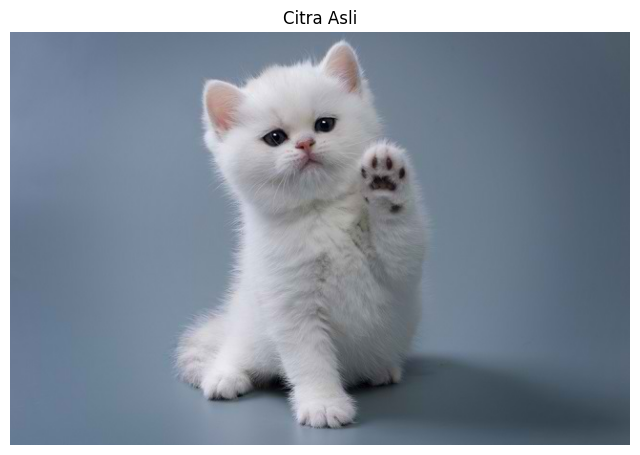

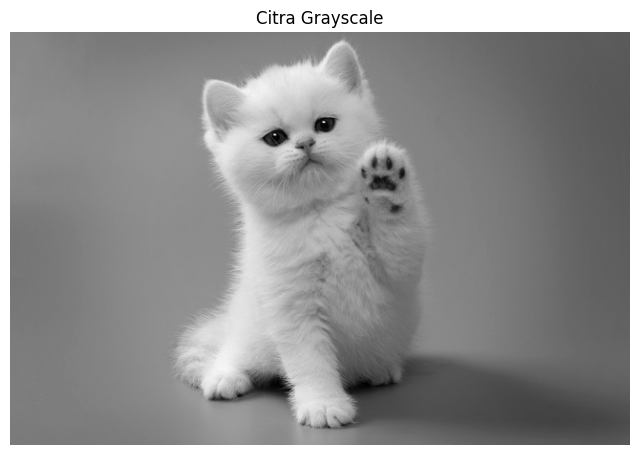

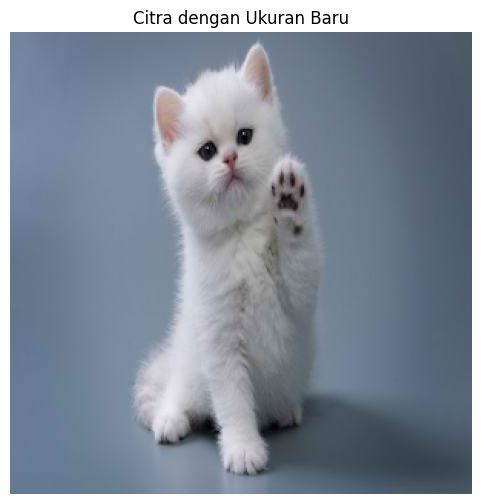

Proses selesai! Citra hasil proses telah disimpan sebagai 'processed_image.jpg'.


In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Memuat citra dari URL atau file lokal
# Untuk praktikum ini, kita akan menggunakan URL gambar
url = 'https://res.cloudinary.com/dk0z4ums3/image/upload/v1661753020/attached_image/inilah-cara-merawat-anak-kucing-yang-tepat.jpg'



# Mengunduh gambar dari URL
import urllib.request
urllib.request.urlretrieve(url, "google_logo.png")

# Membaca citra menggunakan OpenCV
image = cv2.imread("google_logo.png")

# Konversi citra dari BGR (default OpenCV) ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Langkah 2: Menampilkan citra menggunakan Matplotlib
plt.figure(figsize=(8, 6))
plt.title("Citra Asli")
plt.imshow(image_rgb)
plt.axis('off')  # Mematikan sumbu koordinat
plt.show()

# Langkah 3: Mengubah citra menjadi skala abu-abu (grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menampilkan citra grayscale
plt.figure(figsize=(8, 6))
plt.title("Citra Grayscale")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Langkah 4: Mengubah ukuran citra
new_size = (300, 300)  # Ukuran baru (lebar, tinggi)
resized_image = cv2.resize(image_rgb, new_size)

# Menampilkan citra yang telah diubah ukurannya
plt.figure(figsize=(8, 6))
plt.title("Citra dengan Ukuran Baru")
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Langkah 5: Menyimpan citra hasil proses
cv2.imwrite("processed_image.jpg", cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR))

print("Proses selesai! Citra hasil proses telah disimpan sebagai 'processed_image.jpg'.")

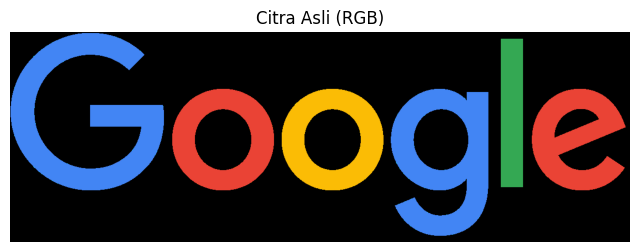

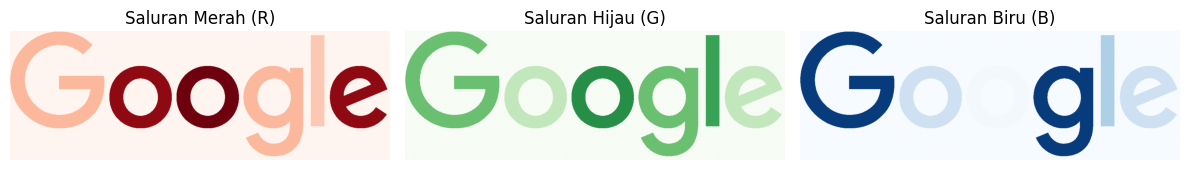

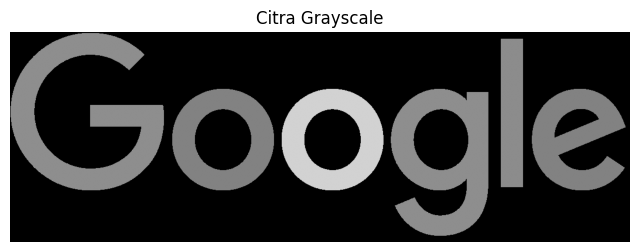

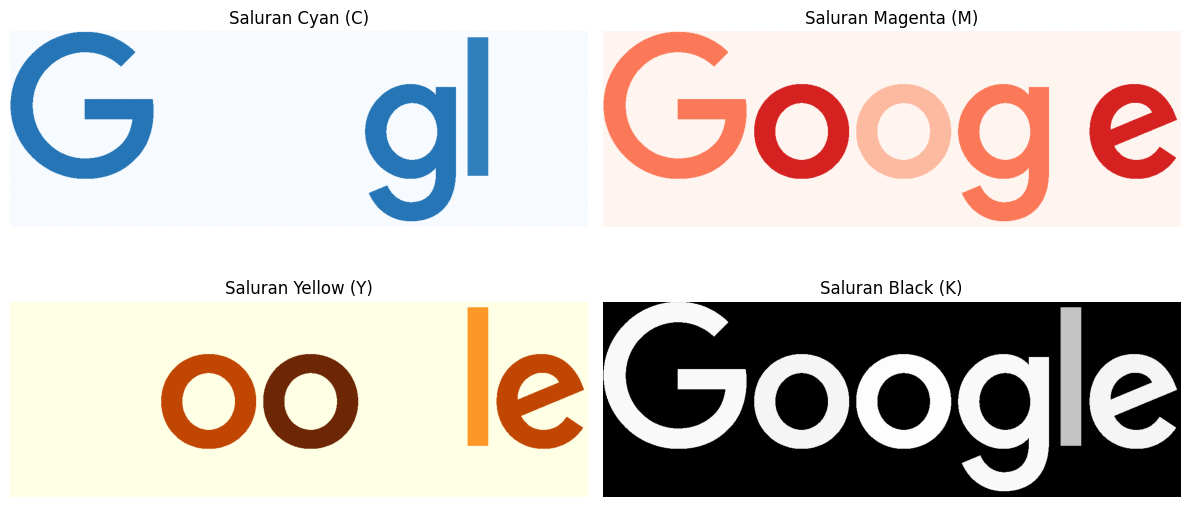

Proses selesai! Anda telah memvisualisasikan model warna RGB, Grayscale, dan CMYK.


In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

# Langkah 1: Memuat citra dari URL atau file lokal
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Google_2015_logo.svg/1200px-Google_2015_logo.svg.png'

# Mengunduh gambar dari URL
import urllib.request
urllib.request.urlretrieve(url, "google_logo.png")

# Membaca citra menggunakan OpenCV
image = cv2.imread("google_logo.png")

# Konversi citra dari BGR (default OpenCV) ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Langkah 2: Menampilkan citra asli
plt.figure(figsize=(8, 6))
plt.title("Citra Asli (RGB)")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Langkah 3: Memisahkan saluran warna RGB
r, g, b = cv2.split(image_rgb)

# Menampilkan setiap saluran warna
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Saluran Merah (R)")
plt.imshow(r, cmap='Reds')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Saluran Hijau (G)")
plt.imshow(g, cmap='Greens')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Saluran Biru (B)")
plt.imshow(b, cmap='Blues')
plt.axis('off')

plt.tight_layout()
plt.show()

# Langkah 4: Konversi citra ke Grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Menampilkan citra grayscale
plt.figure(figsize=(8, 6))
plt.title("Citra Grayscale")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Langkah 5: Konversi citra ke CMYK
def rgb_to_cmyk(rgb_image):
    # Normalisasi nilai RGB ke rentang [0, 1]
    rgb_normalized = rgb_image.astype(np.float32) / 255.0

    # Hitung nilai K (Black)
    k = 1 - np.max(rgb_normalized, axis=2)

    # Hitung nilai C, M, Y
    c = (1 - rgb_normalized[:, :, 0] - k) / (1 - k + 1e-10)
    m = (1 - rgb_normalized[:, :, 1] - k) / (1 - k + 1e-10)
    y = (1 - rgb_normalized[:, :, 2] - k) / (1 - k + 1e-10)

    return c, m, y, k

c, m, y, k = rgb_to_cmyk(image_rgb)

# Menampilkan saluran CMYK
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Saluran Cyan (C)")
plt.imshow(c, cmap='Blues')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Saluran Magenta (M)")
plt.imshow(m, cmap='Reds')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Saluran Yellow (Y)")
plt.imshow(y, cmap='YlOrBr')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Saluran Black (K)")
plt.imshow(k, cmap='Greys')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Proses selesai! Anda telah memvisualisasikan model warna RGB, Grayscale, dan CMYK.")